In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


Total images loaded: 1000
Image shape: (64, 64, 3)


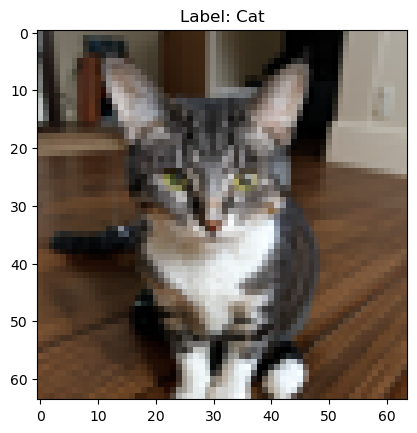

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Paths to the dataset
train_cats_dir = r'\\DESKTOP-N6JHN8Q\Users\premier\Downloads\animal\cat'
train_dogs_dir = r'\\DESKTOP-N6JHN8Q\Users\premier\Downloads\animal\dog'

# Lists to hold image data and labels
train_images = []
train_labels = []

# Function to load images from a directory
def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path)    # Open image
            img = img.resize((64, 64))    # Resize to 64x64
            img = np.array(img)           # Convert to NumPy array
            train_images.append(img)      # Add image to list
            train_labels.append(label)    # Add label (0 for cats, 1 for dogs)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")

# Load cats (label = 0)
load_images_from_folder(train_cats_dir, 0)

# Load dogs (label = 1)
load_images_from_folder(train_dogs_dir, 1)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Normalize the pixel values (0-255) to (0-1)
train_images = train_images / 255.0

# Check if images and labels are loaded correctly
print(f"Total images loaded: {train_images.shape[0]}")
print(f"Image shape: {train_images.shape[1:]}")  # Should be (64, 64, 3)

# Visualize one of the loaded images
plt.imshow(train_images[0])
plt.title(f"Label: {'Cat' if train_labels[0] == 0 else 'Dog'}")
plt.show()

In [22]:
train_images.shape

(1000, 64, 64, 3)

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Reshape labels for TensorFlow
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# build the model

In [6]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Add first convolutional and pooling layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Add second convolutional and pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Add third convolutional and pooling layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps before feeding into fully connected layers
model.add(layers.Flatten())

# Add a fully connected layer
model.add(layers.Dense(128, activation='relu'))

# Output layer for binary classification (cat or dog)
model.add(layers.Dense(1, activation='sigmoid'))  # 1 neuron for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\premier\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Model summary to see the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 479ms/step - accuracy: 0.5578 - loss: 0.6948 - val_accuracy: 0.7600 - val_loss: 0.5182
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 404ms/step - accuracy: 0.7944 - loss: 0.4681 - val_accuracy: 0.8850 - val_loss: 0.3081
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 407ms/step - accuracy: 0.8672 - loss: 0.3157 - val_accuracy: 0.8950 - val_loss: 0.3134
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 461ms/step - accuracy: 0.8867 - loss: 0.2698 - val_accuracy: 0.9200 - val_loss: 0.2165
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.9606 - loss: 0.1253 - val_accuracy: 0.9400 - val_loss: 0.1354
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 482ms/step - accuracy: 0.9909 - loss: 0.0572 - val_accuracy: 0.9450 - val_loss: 0.1291
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 482ms/step - accuracy: 0.9836 - loss: 0.0462 - val_accuracy: 0.9650 - val_loss: 0.1182
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 480ms/step - accuracy: 0.9746 - loss: 0.0591 - val_accu

In [9]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test) 
print(f"Test accuracy: {test_acc}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9665 - loss: 0.1157
Test accuracy: 0.9599999785423279


In [17]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming 'X_test' is your test image data and 'y_test' is the true labels
# 'model' is your trained CNN model

# Step 1: Predict the class probabilities on the test data
y_pred_probs = model.predict(X_test)

# Step 2: Convert the predicted probabilities into binary class labels
# If the predicted probability is > 0.5, it's classified as 'dog' (label 1), otherwise 'cat' (label 0)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

# Step 3: Generate and print the classification report
target_names = ['Cat', 'Dog']  # Define class names
report = classification_report(y_test, y_pred_classes, target_names=target_names)

# Output the classification report
print("Classification Report:")
print(report)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
Classification Report:
              precision    recall  f1-score   support

         Cat       0.97      0.95      0.96        96
         Dog       0.95      0.97      0.96       104

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



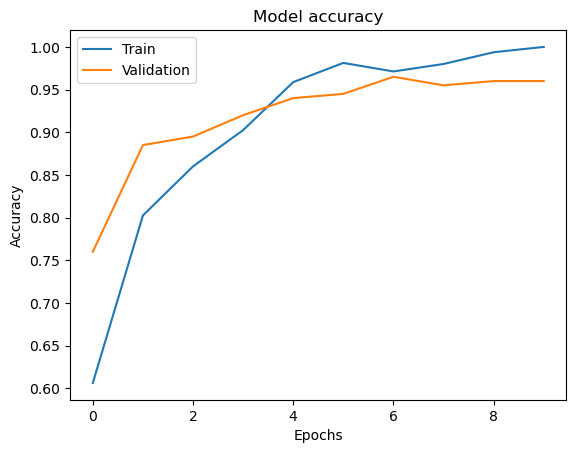

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [ ]:
model.save("cat_dog_clssifier.keras")